Use this cell for all your imports

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import networkx as nx

You will be working with the file data.txt. Use this cell to load its content into the appropriate data structure.

In [118]:
graph = {}

with open('data.txt') as f:
    for line in f:
        if not line.startswith('#'):
            source, target = map(int, line.strip().split())
            if source not in graph:
                graph[source] = []
            graph[source].append(target)


Use this cell to normalize the matrix as you see fit.

In [119]:
from typing import Dict
import numpy as np
from scipy.sparse import csr_matrix


def normalize_adjacency_matrix(adj_matrix: csr_matrix) -> csr_matrix:
    """Normalize the adjacency matrix to make it stochastic."""
    num_nodes = adj_matrix.shape[0]
    col_sums = np.array(adj_matrix.sum(axis=0)).flatten()
    col_sums[col_sums == 0] = 1  # Handle nodes with no outgoing edges
    inv_col_sums = np.reciprocal(col_sums)
    norm_adj_matrix = adj_matrix.multiply(inv_col_sums).tocsr()
    return norm_adj_matrix


def graph_to_csr(graph: Dict[int, set]) -> csr_matrix:
    """Convert a graph represented as a dictionary of sets to a CSR matrix."""
    indices = []
    indptr = [0]
    data = []
    visited_edges = set()

    for node, targets in graph.items():
        for target in targets:
            if (node, target) not in visited_edges:
                indices.append(target)
                data.append(1)
                visited_edges.add((node, target))
        indptr.append(len(indices))

    csr = csr_matrix((data, indices, indptr))
    norm_csr = normalize_adjacency_matrix(csr)
    return norm_csr


In [120]:
normalized_matrix = graph_to_csr(graph)
print(normalized_matrix)

  (0, 9304045)	0
  (0, 9308122)	0
  (0, 9309097)	0
  (0, 9311042)	0
  (0, 9401139)	0
  (0, 9404151)	0
  (0, 9407087)	0
  (0, 9408099)	0
  (0, 9501030)	0
  (0, 9503124)	0
  (0, 9504090)	0
  (0, 9504145)	0
  (0, 9505025)	0
  (0, 9505054)	0
  (0, 9505105)	0
  (0, 9505162)	0
  (0, 9506048)	0
  (0, 9506112)	0
  (0, 9506144)	0
  (0, 9507050)	0
  (0, 9507158)	0
  (0, 9508094)	0
  (0, 9508155)	0
  (0, 9510142)	0
  (0, 9510225)	0
  :	:
  (25054, 9911118)	0
  (25054, 9912097)	0
  (25054, 9912114)	0
  (25054, 9912128)	0
  (25055, 9412229)	0
  (25055, 9502053)	0
  (25055, 9604044)	0
  (25055, 9805008)	0
  (25055, 9808153)	0
  (25055, 9908050)	0
  (25056, 9510017)	0
  (25056, 9610043)	0
  (25056, 9611050)	0
  (25056, 9704080)	0
  (25056, 9902024)	0
  (25056, 9908157)	0
  (25057, 9306153)	0
  (25058, 9707163)	0
  (25058, 9802015)	0
  (25058, 9802074)	0
  (25058, 9805150)	0
  (25058, 9806074)	0
  (25058, 9808140)	0
  (25058, 9810068)	0
  (25058, 9901023)	0


In [121]:
graph = nx.DiGraph(graph)

Apply the PageRank algorithm to the matrix you created.

In [122]:
"""

def pagerank(csr_matrix, damping_factor=0.85, max_iter=100, tol=1e-6):
    n = len(csr_matrix)
    pagerank = np.ones(n) / n
    for i in range(csr_matrix):
        old_pagerank = pagerank.copy()
        pagerank = (1 - damping_factor) / n + damping_factor * np.dot(csr_matrix.T, pagerank)
        if np.linalg.norm(pagerank - old_pagerank) < convergence_threshold:
            break
    return pagerank


"""

'\n\ndef pagerank(csr_matrix, damping_factor=0.85, max_iter=100, tol=1e-6):\n    n = len(csr_matrix)\n    pagerank = np.ones(n) / n\n    for i in range(csr_matrix):\n        old_pagerank = pagerank.copy()\n        pagerank = (1 - damping_factor) / n + damping_factor * np.dot(csr_matrix.T, pagerank)\n        if np.linalg.norm(pagerank - old_pagerank) < convergence_threshold:\n            break\n    return pagerank\n\n\n'

In [123]:
import networkx as nx

# calculate the PageRank scores using the networkx function
pagerank = nx.pagerank(graph, alpha=0.85, tol=1e-5)

# print the PageRank scores for each node
for node, score in pagerank.items():
    print(f"Node {node}: PageRank score = {score:.5f}")


Node 1001: PageRank score = 0.00001
Node 9304045: PageRank score = 0.00006
Node 9308122: PageRank score = 0.00022
Node 9309097: PageRank score = 0.00074
Node 9311042: PageRank score = 0.00013
Node 9401139: PageRank score = 0.00182
Node 9404151: PageRank score = 0.00033
Node 9407087: PageRank score = 0.00571
Node 9408099: PageRank score = 0.00319
Node 9501030: PageRank score = 0.00080
Node 9503124: PageRank score = 0.00387
Node 9504090: PageRank score = 0.00170
Node 9504145: PageRank score = 0.00067
Node 9505025: PageRank score = 0.00019
Node 9505054: PageRank score = 0.00015
Node 9505105: PageRank score = 0.00065
Node 9505162: PageRank score = 0.00042
Node 9506048: PageRank score = 0.00015
Node 9506112: PageRank score = 0.00029
Node 9506144: PageRank score = 0.00020
Node 9507050: PageRank score = 0.00063
Node 9507158: PageRank score = 0.00080
Node 9508094: PageRank score = 0.00016
Node 9508155: PageRank score = 0.00025
Node 9510142: PageRank score = 0.00013
Node 9510225: PageRank score

Node 9808032: PageRank score = 0.00008
Node 9808097: PageRank score = 0.00004
Node 9810090: PageRank score = 0.00003
Node 9810142: PageRank score = 0.00001
Node 9810205: PageRank score = 0.00001
Node 9810227: PageRank score = 0.00006
Node 9901149: PageRank score = 0.00005
Node 9903046: PageRank score = 0.00002
Node 9903143: PageRank score = 0.00002
Node 9903214: PageRank score = 0.00007
Node 9903269: PageRank score = 0.00002
Node 9911195: PageRank score = 0.00002
Node 1132: PageRank score = 0.00003
Node 9403096: PageRank score = 0.00003
Node 9506104: PageRank score = 0.00002
Node 9711020: PageRank score = 0.00004
Node 9811211: PageRank score = 0.00003
Node 9902196: PageRank score = 0.00003
Node 9905038: PageRank score = 0.00005
Node 9905078: PageRank score = 0.00002
Node 9911229: PageRank score = 0.00002
Node 1133: PageRank score = 0.00003
Node 9609209: PageRank score = 0.00013
Node 9704185: PageRank score = 0.00004
Node 9903104: PageRank score = 0.00002
Node 9908193: PageRank score = 

Node 9808151: PageRank score = 0.00002
Node 9809119: PageRank score = 0.00004
Node 9902017: PageRank score = 0.00002
Node 2044: PageRank score = 0.00003
Node 9305123: PageRank score = 0.00003
Node 9306069: PageRank score = 0.00060
Node 9806214: PageRank score = 0.00002
Node 9901076: PageRank score = 0.00007
Node 9902073: PageRank score = 0.00003
Node 9903228: PageRank score = 0.00004
Node 9909013: PageRank score = 0.00003
Node 2045: PageRank score = 0.00002
Node 9508153: PageRank score = 0.00007
Node 9606109: PageRank score = 0.00003
Node 9612196: PageRank score = 0.00004
Node 9904096: PageRank score = 0.00002
Node 2046: PageRank score = 0.00002
Node 9910183: PageRank score = 0.00002
Node 2047: PageRank score = 0.00001
Node 9510221: PageRank score = 0.00009
Node 9710101: PageRank score = 0.00004
Node 9812059: PageRank score = 0.00004
Node 9901011: PageRank score = 0.00006
Node 9901086: PageRank score = 0.00003
Node 9907192: PageRank score = 0.00003
Node 2050: PageRank score = 0.00003
N

Node 2258: PageRank score = 0.00001
Node 9601152: PageRank score = 0.00030
Node 9601177: PageRank score = 0.00019
Node 9607149: PageRank score = 0.00025
Node 9610045: PageRank score = 0.00006
Node 9901092: PageRank score = 0.00002
Node 2259: PageRank score = 0.00001
Node 9811236: PageRank score = 0.00002
Node 3001: PageRank score = 0.00002
Node 9310055: PageRank score = 0.00002
Node 9502104: PageRank score = 0.00001
Node 9508142: PageRank score = 0.00009
Node 9903153: PageRank score = 0.00002
Node 3002: PageRank score = 0.00002
Node 3003: PageRank score = 0.00001
Node 9704093: PageRank score = 0.00004
Node 9812004: PageRank score = 0.00002
Node 9906079: PageRank score = 0.00002
Node 3004: PageRank score = 0.00003
Node 3005: PageRank score = 0.00006
Node 3006: PageRank score = 0.00004
Node 3007: PageRank score = 0.00006
Node 9508003: PageRank score = 0.00004
Node 9907106: PageRank score = 0.00002
Node 3008: PageRank score = 0.00003
Node 9501083: PageRank score = 0.00007
Node 3009: PageR

Node 9811246: PageRank score = 0.00001
Node 9911091: PageRank score = 0.00002
Node 4030: PageRank score = 0.00001
Node 9803251: PageRank score = 0.00015
Node 4031: PageRank score = 0.00001
Node 9407103: PageRank score = 0.00002
Node 9604195: PageRank score = 0.00002
Node 4032: PageRank score = 0.00002
Node 5122: PageRank score = 0.00003
Node 9709135: PageRank score = 0.00001
Node 9709205: PageRank score = 0.00002
Node 4036: PageRank score = 0.00002
Node 9307059: PageRank score = 0.00002
Node 9711005: PageRank score = 0.00010
Node 4037: PageRank score = 0.00001
Node 9406105: PageRank score = 0.00034
Node 9511067: PageRank score = 0.00001
Node 9512089: PageRank score = 0.00011
Node 9604168: PageRank score = 0.00007
Node 9701053: PageRank score = 0.00001
Node 9904011: PageRank score = 0.00001
Node 9910244: PageRank score = 0.00001
Node 9902101: PageRank score = 0.00003
Node 4039: PageRank score = 0.00002
Node 9608116: PageRank score = 0.00013
Node 9803260: PageRank score = 0.00003
Node 99

Node 9210105: PageRank score = 0.00003
Node 9412095: PageRank score = 0.00002
Node 9612192: PageRank score = 0.00002
Node 5228: PageRank score = 0.00001
Node 9505107: PageRank score = 0.00002
Node 5229: PageRank score = 0.00001
Node 9404005: PageRank score = 0.00002
Node 9912146: PageRank score = 0.00002
Node 5230: PageRank score = 0.00002
Node 5231: PageRank score = 0.00001
Node 5232: PageRank score = 0.00002
Node 5233: PageRank score = 0.00002
Node 5234: PageRank score = 0.00002
Node 5235: PageRank score = 0.00002
Node 5237: PageRank score = 0.00002
Node 9412073: PageRank score = 0.00007
Node 9601105: PageRank score = 0.00002
Node 9807092: PageRank score = 0.00004
Node 9605128: PageRank score = 0.00002
Node 5236: PageRank score = 0.00002
Node 9608045: PageRank score = 0.00003
Node 5238: PageRank score = 0.00001
Node 9903019: PageRank score = 0.00003
Node 5240: PageRank score = 0.00001
Node 5241: PageRank score = 0.00002
Node 5242: PageRank score = 0.00002
Node 9148: PageRank score = 

Node 9704198: PageRank score = 0.00004
Node 9706023: PageRank score = 0.00002
Node 9804101: PageRank score = 0.00003
Node 9811121: PageRank score = 0.00001
Node 9902108: PageRank score = 0.00001
Node 7241: PageRank score = 0.00002
Node 7242: PageRank score = 0.00003
Node 7243: PageRank score = 0.00002
Node 9612085: PageRank score = 0.00003
Node 9705237: PageRank score = 0.00002
Node 9710031: PageRank score = 0.00002
Node 9903035: PageRank score = 0.00003
Node 9909122: PageRank score = 0.00001
Node 7245: PageRank score = 0.00002
Node 7246: PageRank score = 0.00001
Node 7247: PageRank score = 0.00002
Node 7248: PageRank score = 0.00001
Node 10148: PageRank score = 0.00002
Node 9405043: PageRank score = 0.00003
Node 9710076: PageRank score = 0.00003
Node 7249: PageRank score = 0.00002
Node 7250: PageRank score = 0.00002
Node 7252: PageRank score = 0.00002
Node 7253: PageRank score = 0.00001
Node 9805073: PageRank score = 0.00002
Node 9805176: PageRank score = 0.00002
Node 9806161: PageRan

Node 9906236: PageRank score = 0.00002
Node 10179: PageRank score = 0.00001
Node 9603094: PageRank score = 0.00002
Node 10180: PageRank score = 0.00001
Node 9609019: PageRank score = 0.00002
Node 9812050: PageRank score = 0.00001
Node 10181: PageRank score = 0.00002
Node 10182: PageRank score = 0.00002
Node 10183: PageRank score = 0.00002
Node 10184: PageRank score = 0.00001
Node 9411058: PageRank score = 0.00002
Node 10185: PageRank score = 0.00002
Node 9608011: PageRank score = 0.00002
Node 9806073: PageRank score = 0.00003
Node 9912194: PageRank score = 0.00002
Node 10186: PageRank score = 0.00004
Node 11137: PageRank score = 0.00004
Node 10188: PageRank score = 0.00001
Node 10189: PageRank score = 0.00001
Node 10190: PageRank score = 0.00003
Node 10191: PageRank score = 0.00001
Node 10192: PageRank score = 0.00002
Node 9509160: PageRank score = 0.00008
Node 9605146: PageRank score = 0.00004
Node 9607043: PageRank score = 0.00002
Node 10193: PageRank score = 0.00001
Node 10194: Page

Node 9305083: PageRank score = 0.00025
Node 9412076: PageRank score = 0.00002
Node 9502054: PageRank score = 0.00002
Node 9610121: PageRank score = 0.00001
Node 9711086: PageRank score = 0.00001
Node 9806086: PageRank score = 0.00001
Node 101077: PageRank score = 0.00001
Node 101078: PageRank score = 0.00003
Node 101079: PageRank score = 0.00001
Node 101080: PageRank score = 0.00001
Node 101082: PageRank score = 0.00002
Node 9410065: PageRank score = 0.00005
Node 9708116: PageRank score = 0.00002
Node 101084: PageRank score = 0.00001
Node 101085: PageRank score = 0.00001
Node 9612093: PageRank score = 0.00001
Node 101087: PageRank score = 0.00001
Node 101088: PageRank score = 0.00002
Node 101089: PageRank score = 0.00002
Node 101090: PageRank score = 0.00001
Node 9712247: PageRank score = 0.00002
Node 101091: PageRank score = 0.00002
Node 101092: PageRank score = 0.00002
Node 101094: PageRank score = 0.00001
Node 101095: PageRank score = 0.00001
Node 101096: PageRank score = 0.00003
No

Node 105014: PageRank score = 0.00001
Node 105015: PageRank score = 0.00001
Node 9308086: PageRank score = 0.00002
Node 105016: PageRank score = 0.00001
Node 9506156: PageRank score = 0.00013
Node 9512152: PageRank score = 0.00004
Node 9707130: PageRank score = 0.00002
Node 105017: PageRank score = 0.00001
Node 105019: PageRank score = 0.00002
Node 105020: PageRank score = 0.00001
Node 105021: PageRank score = 0.00001
Node 105022: PageRank score = 0.00002
Node 9904195: PageRank score = 0.00002
Node 105023: PageRank score = 0.00005
Node 106206: PageRank score = 0.00002
Node 105024: PageRank score = 0.00004
Node 105025: PageRank score = 0.00001
Node 105026: PageRank score = 0.00001
Node 105027: PageRank score = 0.00001
Node 9812189: PageRank score = 0.00001
Node 105028: PageRank score = 0.00002
Node 105029: PageRank score = 0.00001
Node 106197: PageRank score = 0.00001
Node 105031: PageRank score = 0.00001
Node 106097: PageRank score = 0.00002
Node 105033: PageRank score = 0.00001
Node 9

Node 9809051: PageRank score = 0.00002
Node 9901141: PageRank score = 0.00002
Node 108023: PageRank score = 0.00001
Node 108024: PageRank score = 0.00001
Node 9510090: PageRank score = 0.00003
Node 108025: PageRank score = 0.00001
Node 108026: PageRank score = 0.00002
Node 108027: PageRank score = 0.00001
Node 108028: PageRank score = 0.00001
Node 9512165: PageRank score = 0.00004
Node 9606076: PageRank score = 0.00001
Node 9607216: PageRank score = 0.00003
Node 108030: PageRank score = 0.00001
Node 108031: PageRank score = 0.00001
Node 9505003: PageRank score = 0.00002
Node 108032: PageRank score = 0.00001
Node 9706120: PageRank score = 0.00002
Node 9908037: PageRank score = 0.00001
Node 108034: PageRank score = 0.00002
Node 9905109: PageRank score = 0.00002
Node 108035: PageRank score = 0.00001
Node 108036: PageRank score = 0.00001
Node 108037: PageRank score = 0.00001
Node 108038: PageRank score = 0.00001
Node 9903183: PageRank score = 0.00003
Node 9905169: PageRank score = 0.00002


Node 111098: PageRank score = 0.00003
Node 111277: PageRank score = 0.00002
Node 204091: PageRank score = 0.00002
Node 204168: PageRank score = 0.00004
Node 111099: PageRank score = 0.00002
Node 9312005: PageRank score = 0.00014
Node 111100: PageRank score = 0.00001
Node 111101: PageRank score = 0.00001
Node 111103: PageRank score = 0.00001
Node 111104: PageRank score = 0.00001
Node 111105: PageRank score = 0.00001
Node 111106: PageRank score = 0.00003
Node 9712073: PageRank score = 0.00028
Node 111107: PageRank score = 0.00001
Node 111108: PageRank score = 0.00001
Node 111109: PageRank score = 0.00001
Node 111110: PageRank score = 0.00001
Node 111111: PageRank score = 0.00001
Node 111112: PageRank score = 0.00001
Node 111113: PageRank score = 0.00001
Node 9602154: PageRank score = 0.00002
Node 111114: PageRank score = 0.00001
Node 111116: PageRank score = 0.00002
Node 111117: PageRank score = 0.00001
Node 111118: PageRank score = 0.00001
Node 111120: PageRank score = 0.00001
Node 1111

Node 203057: PageRank score = 0.00001
Node 203058: PageRank score = 0.00001
Node 203059: PageRank score = 0.00001
Node 9307074: PageRank score = 0.00003
Node 203060: PageRank score = 0.00001
Node 203061: PageRank score = 0.00002
Node 203062: PageRank score = 0.00001
Node 203063: PageRank score = 0.00001
Node 203064: PageRank score = 0.00001
Node 203065: PageRank score = 0.00003
Node 9310117: PageRank score = 0.00002
Node 9411115: PageRank score = 0.00002
Node 203066: PageRank score = 0.00002
Node 203068: PageRank score = 0.00001
Node 203069: PageRank score = 0.00001
Node 9803028: PageRank score = 0.00012
Node 203070: PageRank score = 0.00002
Node 203071: PageRank score = 0.00001
Node 203072: PageRank score = 0.00001
Node 203073: PageRank score = 0.00001
Node 203074: PageRank score = 0.00001
Node 203075: PageRank score = 0.00001
Node 9502041: PageRank score = 0.00002
Node 203076: PageRank score = 0.00001
Node 9211015: PageRank score = 0.00010
Node 9512177: PageRank score = 0.00005
Node 

Node 206227: PageRank score = 0.00001
Node 206229: PageRank score = 0.00001
Node 206230: PageRank score = 0.00001
Node 206231: PageRank score = 0.00001
Node 206232: PageRank score = 0.00001
Node 9608040: PageRank score = 0.00002
Node 9707229: PageRank score = 0.00001
Node 9802188: PageRank score = 0.00001
Node 9810189: PageRank score = 0.00001
Node 206233: PageRank score = 0.00001
Node 206234: PageRank score = 0.00001
Node 206236: PageRank score = 0.00002
Node 9408103: PageRank score = 0.00003
Node 206237: PageRank score = 0.00002
Node 206238: PageRank score = 0.00001
Node 206239: PageRank score = 0.00001
Node 206240: PageRank score = 0.00001
Node 206241: PageRank score = 0.00002
Node 9503064: PageRank score = 0.00002
Node 206242: PageRank score = 0.00001
Node 206243: PageRank score = 0.00001
Node 206244: PageRank score = 0.00001
Node 206245: PageRank score = 0.00001
Node 206246: PageRank score = 0.00001
Node 206247: PageRank score = 0.00001
Node 206248: PageRank score = 0.00002
Node 2

Node 210245: PageRank score = 0.00001
Node 210247: PageRank score = 0.00001
Node 210248: PageRank score = 0.00001
Node 210249: PageRank score = 0.00001
Node 210250: PageRank score = 0.00001
Node 210251: PageRank score = 0.00001
Node 210252: PageRank score = 0.00001
Node 210253: PageRank score = 0.00001
Node 210254: PageRank score = 0.00001
Node 210255: PageRank score = 0.00001
Node 9305093: PageRank score = 0.00003
Node 9305094: PageRank score = 0.00003
Node 210256: PageRank score = 0.00001
Node 210257: PageRank score = 0.00001
Node 210258: PageRank score = 0.00001
Node 210261: PageRank score = 0.00001
Node 210262: PageRank score = 0.00001
Node 210263: PageRank score = 0.00001
Node 210264: PageRank score = 0.00001
Node 210265: PageRank score = 0.00001
Node 210266: PageRank score = 0.00001
Node 210267: PageRank score = 0.00001
Node 9401167: PageRank score = 0.00007
Node 9403197: PageRank score = 0.00003
Node 9609030: PageRank score = 0.00002
Node 9906186: PageRank score = 0.00001
Node 2

Node 303031: PageRank score = 0.00001
Node 303033: PageRank score = 0.00001
Node 303034: PageRank score = 0.00001
Node 303035: PageRank score = 0.00001
Node 303139: PageRank score = 0.00001
Node 303036: PageRank score = 0.00001
Node 303038: PageRank score = 0.00001
Node 303039: PageRank score = 0.00001
Node 303040: PageRank score = 0.00001
Node 303041: PageRank score = 0.00001
Node 9302057: PageRank score = 0.00002
Node 9605111: PageRank score = 0.00001
Node 303042: PageRank score = 0.00001
Node 303043: PageRank score = 0.00001
Node 303044: PageRank score = 0.00001
Node 303045: PageRank score = 0.00001
Node 303046: PageRank score = 0.00001
Node 303047: PageRank score = 0.00001
Node 303048: PageRank score = 0.00001
Node 303049: PageRank score = 0.00001
Node 303050: PageRank score = 0.00001
Node 9804113: PageRank score = 0.00001
Node 303051: PageRank score = 0.00001
Node 303052: PageRank score = 0.00001
Node 303053: PageRank score = 0.00001
Node 9406096: PageRank score = 0.00002
Node 303

Node 9310193: PageRank score = 0.00001
Node 9310197: PageRank score = 0.00003
Node 9310200: PageRank score = 0.00011
Node 9311004: PageRank score = 0.00001
Node 9311006: PageRank score = 0.00001
Node 9311008: PageRank score = 0.00005
Node 9311013: PageRank score = 0.00001
Node 9311016: PageRank score = 0.00001
Node 9311017: PageRank score = 0.00008
Node 9311020: PageRank score = 0.00002
Node 9311021: PageRank score = 0.00001
Node 9311026: PageRank score = 0.00002
Node 9311034: PageRank score = 0.00001
Node 9311036: PageRank score = 0.00001
Node 9311039: PageRank score = 0.00001
Node 9311041: PageRank score = 0.00001
Node 9311048: PageRank score = 0.00001
Node 9311049: PageRank score = 0.00003
Node 9311053: PageRank score = 0.00003
Node 9311054: PageRank score = 0.00001
Node 9311063: PageRank score = 0.00001
Node 9311064: PageRank score = 0.00002
Node 9311066: PageRank score = 0.00002
Node 9311067: PageRank score = 0.00001
Node 9311068: PageRank score = 0.00001
Node 9311072: PageRank sc

Node 9504016: PageRank score = 0.00001
Node 9504021: PageRank score = 0.00001
Node 9504023: PageRank score = 0.00001
Node 9504030: PageRank score = 0.00002
Node 9504035: PageRank score = 0.00001
Node 9504038: PageRank score = 0.00002
Node 9504040: PageRank score = 0.00001
Node 9504041: PageRank score = 0.00002
Node 9504043: PageRank score = 0.00001
Node 9504044: PageRank score = 0.00001
Node 9504045: PageRank score = 0.00001
Node 9504046: PageRank score = 0.00002
Node 9504049: PageRank score = 0.00003
Node 9504052: PageRank score = 0.00002
Node 9504053: PageRank score = 0.00003
Node 9504054: PageRank score = 0.00001
Node 9504057: PageRank score = 0.00002
Node 9504058: PageRank score = 0.00001
Node 9504060: PageRank score = 0.00002
Node 9504062: PageRank score = 0.00001
Node 9504064: PageRank score = 0.00002
Node 9504068: PageRank score = 0.00001
Node 9504069: PageRank score = 0.00001
Node 9504070: PageRank score = 0.00002
Node 9504074: PageRank score = 0.00002
Node 9504076: PageRank sc

Node 9608051: PageRank score = 0.00001
Node 9608052: PageRank score = 0.00001
Node 9608055: PageRank score = 0.00001
Node 9608057: PageRank score = 0.00001
Node 9608062: PageRank score = 0.00001
Node 9608065: PageRank score = 0.00002
Node 9608067: PageRank score = 0.00001
Node 9608068: PageRank score = 0.00002
Node 9608069: PageRank score = 0.00001
Node 9608072: PageRank score = 0.00001
Node 9608073: PageRank score = 0.00001
Node 9608075: PageRank score = 0.00001
Node 9608076: PageRank score = 0.00006
Node 9608080: PageRank score = 0.00001
Node 9608081: PageRank score = 0.00001
Node 9608087: PageRank score = 0.00001
Node 9608088: PageRank score = 0.00002
Node 9608089: PageRank score = 0.00001
Node 9608094: PageRank score = 0.00001
Node 9608097: PageRank score = 0.00001
Node 9608098: PageRank score = 0.00001
Node 9608100: PageRank score = 0.00002
Node 9608101: PageRank score = 0.00002
Node 9608106: PageRank score = 0.00002
Node 9608107: PageRank score = 0.00001
Node 9608112: PageRank sc

Node 9802048: PageRank score = 0.00001
Node 9802050: PageRank score = 0.00002
Node 9802053: PageRank score = 0.00001
Node 9802054: PageRank score = 0.00001
Node 9802059: PageRank score = 0.00001
Node 9802062: PageRank score = 0.00001
Node 9809206: PageRank score = 0.00001
Node 9802073: PageRank score = 0.00001
Node 9802075: PageRank score = 0.00001
Node 9802077: PageRank score = 0.00002
Node 9802078: PageRank score = 0.00001
Node 9802079: PageRank score = 0.00001
Node 9802084: PageRank score = 0.00002
Node 9802089: PageRank score = 0.00001
Node 9802091: PageRank score = 0.00002
Node 9802093: PageRank score = 0.00002
Node 9802094: PageRank score = 0.00001
Node 9802095: PageRank score = 0.00001
Node 9802098: PageRank score = 0.00001
Node 9802104: PageRank score = 0.00001
Node 9802110: PageRank score = 0.00001
Node 9802125: PageRank score = 0.00001
Node 9802131: PageRank score = 0.00002
Node 9802134: PageRank score = 0.00001
Node 9802136: PageRank score = 0.00002
Node 9802146: PageRank sc

Node 9209016: PageRank score = 0.00072
Node 9205027: PageRank score = 0.00151
Node 9406012: PageRank score = 0.00034
Node 9201059: PageRank score = 0.00078
Node 9207060: PageRank score = 0.00073
Node 9201056: PageRank score = 0.00097
Node 9206080: PageRank score = 0.00004
Node 9205009: PageRank score = 0.00024
Node 9206101: PageRank score = 0.00007
Node 9409111: PageRank score = 0.00030
Node 9610132: PageRank score = 0.00001
Node 9204060: PageRank score = 0.00008
Node 9205004: PageRank score = 0.00019
Node 9304026: PageRank score = 0.00010
Node 9207091: PageRank score = 0.00010
Node 9210068: PageRank score = 0.00009
Node 9405012: PageRank score = 0.00003
Node 9212115: PageRank score = 0.00004
Node 9511169: PageRank score = 0.00004
Node 9201007: PageRank score = 0.00021
Node 9204031: PageRank score = 0.00019
Node 9306005: PageRank score = 0.00001
Node 9202037: PageRank score = 0.00011
Node 9202014: PageRank score = 0.00057
Node 9203083: PageRank score = 0.00022
Node 9309089: PageRank sc

Node 9209077: PageRank score = 0.00003
Node 9307099: PageRank score = 0.00007
Node 9403101: PageRank score = 0.00001
Node 9906140: PageRank score = 0.00003
Node 9412210: PageRank score = 0.00004
Node 9208042: PageRank score = 0.00002
Node 9811154: PageRank score = 0.00004
Node 9309045: PageRank score = 0.00045
Node 9710157: PageRank score = 0.00002
Node 9203029: PageRank score = 0.00005
Node 9306008: PageRank score = 0.00009
Node 9304020: PageRank score = 0.00002
Node 9411088: PageRank score = 0.00003
Node 9406092: PageRank score = 0.00002
Node 9410134: PageRank score = 0.00004
Node 9407150: PageRank score = 0.00002
Node 9204039: PageRank score = 0.00011
Node 9501081: PageRank score = 0.00004
Node 9203014: PageRank score = 0.00001
Node 9201044: PageRank score = 0.00013
Node 9609232: PageRank score = 0.00004
Node 9606178: PageRank score = 0.00002
Node 9408122: PageRank score = 0.00004
Node 9411155: PageRank score = 0.00001
Node 9210037: PageRank score = 0.00005
Node 9911168: PageRank sc

Node 9302082: PageRank score = 0.00001
Node 9209090: PageRank score = 0.00001
Node 9210042: PageRank score = 0.00002
Node 9211105: PageRank score = 0.00002
Node 9310154: PageRank score = 0.00002
Node 9210058: PageRank score = 0.00002
Node 9207068: PageRank score = 0.00005
Node 9207110: PageRank score = 0.00005
Node 9305144: PageRank score = 0.00001
Node 9310039: PageRank score = 0.00001
Node 9202033: PageRank score = 0.00001
Node 9303061: PageRank score = 0.00002
Node 9309096: PageRank score = 0.00001
Node 9211099: PageRank score = 0.00003
Node 9204066: PageRank score = 0.00002
Node 9205019: PageRank score = 0.00002
Node 9206104: PageRank score = 0.00002
Node 9207116: PageRank score = 0.00001
Node 9312197: PageRank score = 0.00001
Node 9311119: PageRank score = 0.00002
Node 9311096: PageRank score = 0.00002
Node 9402011: PageRank score = 0.00004
Node 9301011: PageRank score = 0.00001
Node 9311123: PageRank score = 0.00002
Node 9312092: PageRank score = 0.00003
Node 9404016: PageRank sc

Output a list of the 100 most important papers along with their importance

In [124]:
# sort the PageRank scores in descending order and print the top 100 items
top_papers = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:100]
for i, (node, score) in enumerate(top_papers):
    print(f"{i+1}. Node {node}: PageRank score = {score:.5f}")

1. Node 9407087: PageRank score = 0.00571
2. Node 9510017: PageRank score = 0.00400
3. Node 9503124: PageRank score = 0.00387
4. Node 9711200: PageRank score = 0.00380
5. Node 9408099: PageRank score = 0.00319
6. Node 9402044: PageRank score = 0.00310
7. Node 9610043: PageRank score = 0.00284
8. Node 9410167: PageRank score = 0.00267
9. Node 9802150: PageRank score = 0.00253
10. Node 9510135: PageRank score = 0.00240
11. Node 9802109: PageRank score = 0.00234
12. Node 9402002: PageRank score = 0.00223
13. Node 9205068: PageRank score = 0.00216
14. Node 9906064: PageRank score = 0.00191
15. Node 9510209: PageRank score = 0.00183
16. Node 9401139: PageRank score = 0.00182
17. Node 9504090: PageRank score = 0.00170
18. Node 208020: PageRank score = 0.00170
19. Node 9908142: PageRank score = 0.00161
20. Node 9304154: PageRank score = 0.00156
21. Node 9205027: PageRank score = 0.00151
22. Node 9501068: PageRank score = 0.00143
23. Node 9207016: PageRank score = 0.00143
24. Node 9711162: Pag

Visualize your results

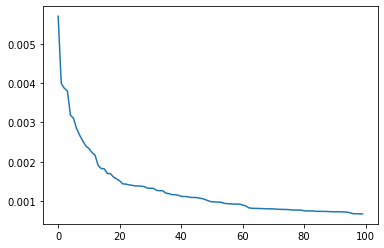

In [125]:
papers = pagerank.items()
# scores into list for plotting
scores = [score for node, score in top_papers]
plt.plot(scores)

plt.show()
